
# Apresentar um problema da área elétrica

O problema em questão é a simulação do sistema fotovoltaico utilizado no barco solar do IFSC (Zenite Solar). O sistema é composto por um painel solar, um controlador de carga e uma bateria. A simulação é crucial tanto para a validação de algoritmos MPPT (Maximum Power Point Tracking) quanto para o dimensionamento adequado do sistema.

![sistema](./assets/trabalho-pratico/sistema.png)

Para modelar o sistema de forma eficaz, ele será dividido em três componentes principais:

1. **Painel Solar**: Este é o foco do trabalho. O painel solar é responsável por converter a energia solar em energia elétrica. A modelagem precisa considerar fatores como a intensidade da luz solar e a eficiência do painel.

2. **Controlador de Carga**: Este dispositivo gerencia o fluxo de energia elétrica entre o painel solar e a bateria. Ele é crucial para otimizar o armazenamento de energia e para proteger a bateria contra sobrecarga ou descarga excessiva.

3. **Bateria**: A bateria armazena a energia elétrica gerada pelo painel solar. A modelagem deve considerar a capacidade da bateria, a eficiência de armazenamento e os limites de carga e descarga.

O objetivo é desenvolver uma simulação precisa que possa ser usada para validar algoritmos MPPT e para dimensionar o sistema de forma eficiente.








# Porquê que o problema é um problema

A Importância e Complexidade da Simulação do Sistema Fotovoltaico do Barco Solar do IFSC (Zenite Solar)

## Por Que o Problema é Importante

O problema da simulação do sistema fotovoltaico do barco solar é crucial por várias razões:

- Desenvolvimento de Algoritmos MPPT
  - O modelo do painel solar é fundamental para o desenvolvimento e a validação de algoritmos de Rastreamento do Ponto de Máxima Potência (MPPT). Com um modelo preciso, é possível estimar o ganho do conversor no controlador de carga, maximizando assim a eficiência do sistema.

- Planejamento Estratégico
  - Um modelo preciso do sistema fotovoltaico é vital para o planejamento estratégico. Com dados confiáveis sobre o modelo e os parâmetros do sistema, além de previsões de irradiação solar, é possível desenvolver estratégias para competições futuras. Por exemplo, sabendo quanto energia o barco vai carregar durante uma prova, pode-se planejar o uso da energia de forma mais eficiente.

- Dimensionamento do Sistema
  - O modelo é útil para o dimensionamento adequado do sistema fotovoltaico, incluindo a seleção do tamanho do painel solar, a capacidade da bateria e as especificações do controlador de carga.

## Por Que o Problema tem dificuldades

Além da sua importância, o problema apresenta desafios significativos que tornam sua resolução complexa:

- Comportamento Não Linear do Painel Solar
  - O painel solar tem um comportamento não linear. Isso significa que pequenas variações nas condições, como intensidade da luz solar ou temperatura, podem resultar em mudanças significativas na saída de energia. Isso torna a modelagem e a simulação mais complexas.

- Dependência Circular entre Componentes
  - A potência do painel solar depende da carga (como a bateria), e a carga depende da potência disponível do painel. Essa dependência circular torna a modelagem e a simulação mais desafiadoras, exigindo uma abordagem da modelagem do sistema integro.


# Apresentação da solução analítica ou a explicação do porquê ela não é possível

O Modelo do painel solar pode ser descrito por:

![](./assets/panel_electric_model.jpg)

$$
I = I_{ph} - I_0 \left( e^{\frac{V + IR_s}{nV_T}} - 1 \right) - \frac{V + IR_s}{R_{sh}}
$$

Onde:

- $I$ é a corrente de saída do painel solar.
- $I_{ph}$ é a corrente fotogerada.
- $I_0$ é a corrente de saturação reversa do diodo.
- $V$ é a tensão de saída do painel solar.
- $R_s$ é a resistência série.
- $R_{sh}$ é a resistência shunt.
- $n$ é o fator de idealidade do diodo.
- $V_T$ é a tensão térmica.

O controlador de carga é modelado como um conversor DC-DC Cùk, O modelo do ganho do conversor Cùk é dado por:
$$
\frac{V_{out}}{V_{in}} = \frac{1}{1 - D}
$$

Onde:

- $V_{out}$ é a tensão de saída do conversor (V).
- $V_{in}$ é a tensão de entrada do conversor (V).
- $D$ é o ciclo de trabalho do conversor.

A bateria é modelada como um resistor de carga com uma fonte de tensão, a corrente de carga da bateria é dada por:
$$
I_{bat} = \frac{V_{bat} - V_{out}}{R_{bat}}
$$

Onde:

- $I_{bat}$ é a corrente de carga da bateria (A).
- $V_{bat}$ é a tensão da bateria a circuito aberto (V).
- $V_{out}$ é a tensão de saída do conversor (V).
- $R_{bat}$ é a resistência de carga da bateria ($\Omega$).

Sistema de equações:

\begin{align*}
\text{Painel Solar:} \quad I &= I_{l} - I_0 \left( e^{\frac{V + IR_s}{nV_T}} - 1 \right) - \frac{V + IR_s}{R_{sh}}, \\
\text{Conversor DC-DC Cùk:} \quad \frac{V_{out}}{V_{in}} &= \frac{1}{1 - D}, \\
\text{Bateria:} \quad I_{bat} &= \frac{V_{bat} - V_{out}}{R_{bat}}.
\end{align*}


Para representar todo o sistema em uma única equação, teria que expressar uma variável em termos das outras. No entanto, o sistema é não-linear e composto por várias partes interdependentes, o que torna difícil condensá-lo em uma única equação analítica, ja que a corrente do painel solar depende dela mesma. Portanto, a solução analítica não é possível.



# Escolher e justificar a escolha de um método numérico que resolva o problema proposto

O método de Newton-Raphson foi selecionado para resolver o problema proposto. A escolha se baseia em várias razões fundamentais:

## Tratamento de Não-linearidade

O sistema em questão, especialmente o componente do painel solar, é não-linear. Newton-Raphson é eficaz para resolver equações não-lineares, o que o torna adequado para este caso.

## Facilidade de Implementação

Newton-Raphson é um método bem conhecido e documentado. Há muitas bibliotecas de software disponíveis que facilitam sua implementação, tornando-o prático para este projeto.

## Gestão de Interdependência de Equações

As equações do sistema são interdependentes; uma mudança em uma afeta as outras. Newton-Raphson pode resolver um sistema de equações simultaneamente, o que é importante para a precisão do modelo.



# Apresentar a resolução do problema pelo método numérico escolhido



O controlador de carga é modelado como um conversor DC-DC Cùk, O modelo do ganho do conversor Cùk é dado por:
$$
\frac{V_{out}}{V_{in}} = \frac{1}{1 - D}
$$

Onde:

- $V_{out}$ é a tensão de saída do conversor (V).
- $V_{in}$ é a tensão de entrada do conversor (V).
- $D$ é o ciclo de trabalho do conversor.

A bateria é modelada como um resistor de carga com uma fonte de tensão, a corrente de carga da bateria é dada por:
$$
I_{bat} = \frac{V_{bat} - V_{out}}{R_{bat}}
$$

Onde:

- $I_{bat}$ é a corrente de carga da bateria (A).
- $V_{bat}$ é a tensão da bateria a circuito aberto (V).
- $V_{out}$ é a tensão de saída do conversor (V).
- $R_{bat}$ é a resistência de carga da bateria ($\Omega$).


## Painel Solar

O painel solar do barco é RNG-175DB-H e será modelado com o modelo de diodo unico com duas resistencias, o modelo pode ser visto na figura abaixo.

![](./assets/panel_electric_model.jpg)

$$
I = I_{ph} - I_{d} - I_{sh} \\
I = I_{ph} - I_0 \left( e^{\frac{\frac{V}{Ns} + IR_s}{nV_T}} - 1 \right) - \frac{\frac{V}{Ns} + IR_s}{R_{sh}}
$$

Onde:

- $I$ é a corrente de saída do painel solar.
- $I_{ph}$ é a corrente fotogerada.
- $I_0$ é a corrente de saturação reversa do diodo.
- $V$ é a tensão de saída do painel solar.
- $R_s$ é a resistência série.
- $R_{sh}$ é a resistência shunt.
- $n$ é o fator de idealidade do diodo.
- $V_T$ é a tensão térmica.
- $Ns$ numero de celulas em serie

Segundo o datasheet e a tecnologia do painel, os valores dos parâmetros são, está sendo considerado a temperatura ambiente de 25°C:

In [1]:
import numpy as np
# Number of cells in series
Ns = 36
# Monocrystalline cell Ideality factor
n = 1.16
# Boltzmann‘s constant
k = 1.38064852e-23
# Band gap energy of the silicon
Eg = 1.17
# Electron charge
q = 1.60217662e-19
# Temperature in Kelvin
T = 300
# Temperature reference in Kelvin
Tr = 298
# Cell‘s short circuit current at STC
Ior = 2e-5
# Shunt resistance
Rs = 0.1
# Series resistance
Rsh = 330.0
# Open-circuit voltage
Voc = 24.9
# Short-circuit current
Isc = 9.65
Iscr = Isc
# Cell‘s short-circuit current temperature coefficient
ki = (0.05 / 100) * Isc
# Reference solar radiation
Sr = 1000
# Solar irradiance
S = 1000


# Reverse saturation current
Ior = Isc / (np.exp((q * Voc / Ns) / (n * k * T)) - 1)
Io = Ior * ((T / Tr)**3) * np.exp((q * Eg / (n * k)) * ((1 / Tr) - (1 / T)))

# Thermal junction voltage
Vt = k * T / q

# Light-generated current or photocurrent
Iph = (Iscr + ki * (T - Tr)) * (S / Sr)


### Montando a equação do painel solar





In [2]:
import sympy as sym
import scipy as sci
import matplotlib.pyplot as plt

V_pan, I_pan = sym.symbols('V_pan I_pan')
panel = (Iph - (Io * (sym.exp((((V_pan) + I_pan * Rs) / (n * Ns * Vt))) - 1)) - ((V_pan) + I_pan * Rs) / Rsh) - I_pan
display(panel)


-1.00030303030303*I_pan - 0.00303030303030303*V_pan - 1.23071384677417e-9*exp(0.0926286881753403*I_pan + 0.926286881753403*V_pan) + 9.65965000123071

## Controlador de Carga

O controlador de carga é modelado como um conversor DC-DC Cùk, O modelo do ganho do conversor Cùk é dado por:
$$
\frac{V_{out}}{V_{in}} = \frac{1}{1 - D}
$$

### Montando a equação do controlador de carga

$$
0 = \frac{V_{out}}{V_{in}} - \frac{1}{1 - D}
$$



In [3]:
# Duty cycle
D = sym.symbols('D')
V_cuk = sym.symbols('V_cuk')

cuk = (V_cuk / V_pan) - (1 / (1 - D))

display(cuk)



V_cuk/V_pan - 1/(1 - D)

## Batéria

A bateria são 3 baterias em serie de 12V yellow-top da Optima, para simplificar o modelo, será considerado apenas uma bateria de 36V e o modelo so terá em conta a resistencia interna da bateria.

### Montando a equação da bateria

$$
0 = I_{bat} - \frac{V_{cuk} - V_{bat}}{R_{bat}}
$$

In [4]:
V_bat = sym.symbols('V_bat')

# Internal resistance of the battery
R_bat = 0.1 
# open circuit Battery voltage 
V_bat = 12 * 3 

# Battery current (considering cuk eficciency = 1)
I_bat = V_pan * I_pan / V_bat

bat = ((V_cuk - V_bat) / R_bat) - I_bat

display(bat)

-I_pan*V_pan/36 + 10.0*V_cuk - 360.0

## Montando a equação do sistema

#### Como o conversor e a bateria são lineares podem ser unidos em uma unica equação

In [5]:
bat_cuk = bat.subs(V_cuk, sym.solve(cuk, V_cuk)[0])

display(bat.subs(V_cuk, sym.solve(cuk, V_cuk)[0]))

-I_pan*V_pan/36 - 10.0*V_pan/(D - 1) - 360.0

#### Montando o sistema de equações

$$
\begin{cases}
	- 1.00030303030303 I_{pan} - 0.00303030303030303 V_{pan} - 1.23071384677417 \cdot 10^{-9} e^{0.0926286881753403 I_{pan} + 0.926286881753403 V_{pan}} + 9.65965000123071  = 0\\
	- \frac{I_{pan} V_{pan}}{36} - \frac{10.0 V_{pan}}{D - 1} - 360.0 = 0
\end{cases}
$$

### Resolvendo o sistema de equações

Para isto sera calculado o jacobiano do sistema de equações e resolvido pelo metodo de Newton-Raphson.

In [6]:

# Newton-Raphson method
def newton_raphson(f, x0, jacobian, tol, max_iter):
	x = x0

	for i in range(max_iter):
		f_value = f(x)

		# Resovling deltas
		inv_J = np.linalg.inv(jacobian(x))
		delta = np.dot(inv_J, -f_value)

		x = x + delta

		iters = i
		if np.linalg.norm(delta) < tol:
			break


	return x, iters
	

In [7]:
import scipy.optimize as opt

def solve_system(duty):
	# Forcing a duty cycle
	bat_cuk_duty = bat_cuk.subs(D, duty)

	# Lambdify the functions
	panel_lamb = sym.lambdify((V_pan, I_pan), panel)
	bat_cuk_lamb = sym.lambdify((V_pan, I_pan), bat_cuk_duty)



	# Adapt the functions to numpy
	def f1(x):
		return panel_lamb(x[0], x[1])

	def f2(x):
		# force a duty cycle
		return bat_cuk_lamb(x[0], x[1])

	J = sym.Matrix(
			[
				[sym.diff(panel, V_pan), sym.diff(panel, I_pan)],
				[sym.diff(bat_cuk_duty, V_pan), sym.diff(bat_cuk_duty, I_pan)]
			]
		)

	# Convert sympy to numpy
	J = sym.lambdify((V_pan, I_pan), J)

	def jacobian(x):
		return J(x[0], x[1])


	# Initial guess
	x0 = [18, 9]

	# Solve the system of equations
	lambda x: np.array([f1(x), f2(x)]).flatten()

	res, iter = newton_raphson(lambda x: np.array([f1(x), f2(x)]).flatten(), x0, jacobian, 1e-6, 100)

	# Get the solution
	return res, iter


### Mostrando os resultados

Text(0.5, 0, 'Duty cycle')

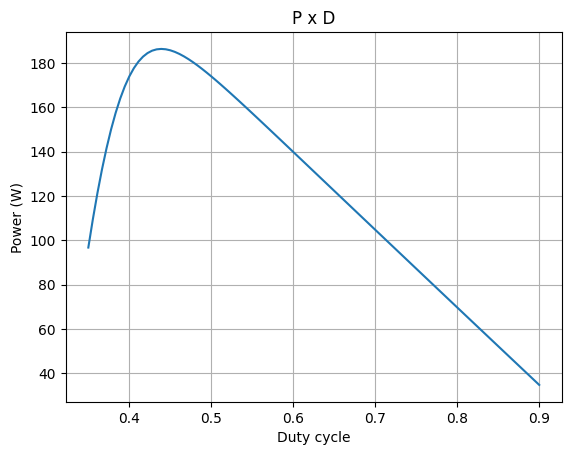

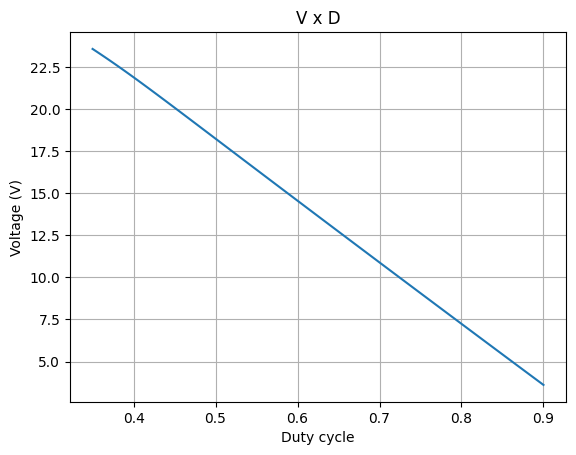

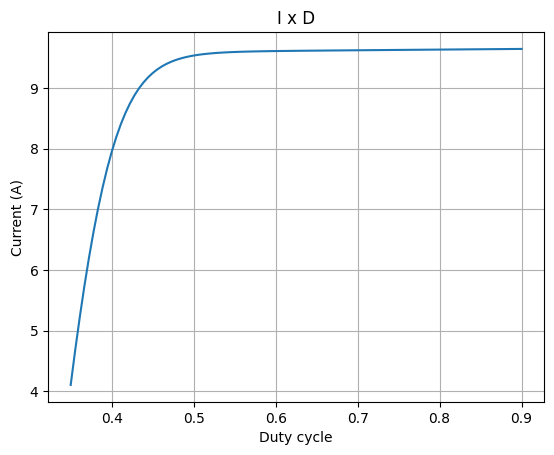

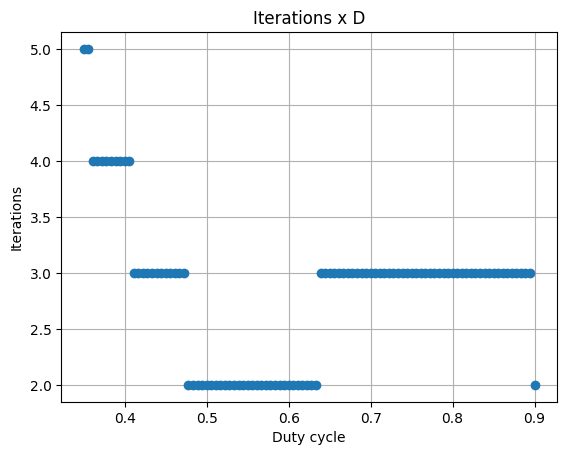

In [8]:
# Plot some duty cycles
duty_cycles = np.linspace(0.35, 0.9, 100)

# Plot the P x D curve
plt.figure()
power = []
for duty in duty_cycles:
	res = solve_system(duty)[0]
	power.append(res[0] * res[1])

# Plot the solution
plt.plot(duty_cycles, power)
plt.title("P x D")
plt.grid()
plt.ylabel('Power (W)')
plt.xlabel('Duty cycle')

# Plot the V x D curve
plt.figure()
voltage = []
for duty in duty_cycles:
	res = solve_system(duty)[0]
	voltage.append(res[0])

# Plot the solution
plt.plot(duty_cycles, voltage)
plt.title("V x D")
plt.grid()
plt.ylabel('Voltage (V)')
plt.xlabel('Duty cycle')


# Plot the I x D curve
plt.figure()
current = []
for duty in duty_cycles:
	res = solve_system(duty)[0]
	current.append(res[1])

# Plot the solution
plt.plot(duty_cycles, current)
plt.title("I x D")
plt.grid()
plt.ylabel('Current (A)')
plt.xlabel('Duty cycle')

# Plot the iterations x D curve
plt.figure()
iterations = []
for duty in duty_cycles:
	res = solve_system(duty)[1]
	iterations.append(res)

# Plot the solution
plt.plot(duty_cycles, iterations, 'o')
plt.title("Iterations x D")
plt.grid()
plt.ylabel('Iterations')
plt.xlabel('Duty cycle')



# Justificar se a Solução Obtida é Adequada – Considerações Finais

As soluções obtidas apresentam similaridades com os resultados disponíveis na literatura acadêmica e industrial. No entanto, existem discrepâncias notáveis, especialmente no que diz respeito ao valor do ponto de máxima potência de transferência (MPPT). O modelo sugere um valor de ciclo de trabalho (duty cycle) para o MPPT mais próximo de 0.4, enquanto valores práticos frequentemente apontam para um valor em torno de 0.6.

## Possíveis Razões para as Discrepâncias

1. **Simplicidade do Modelo do Conversor**: O modelo utilizado assume que o conversor opera sempre em modo contínuo. Esta é uma simplificação que pode não se aplicar em todas as condições operacionais reais.
2. **Sensibilidade do Modelo do Painel Solar**: Parâmetros como o fator de idealidade \( n \), a corrente de saturação reversa \( I_0 \), e a resistência em série \( R_s \) são críticos para a precisão do modelo. Os valores teóricos utilizados para esses parâmetros podem não refletir as condições reais, levando a discrepâncias.
3. **Necessidade de Calibração**: A obtenção de uma curva de calibração específica para o painel solar em uso poderia fornecer parâmetros mais precisos, alinhando melhor os resultados do modelo com observações experimentais.

## Eficiência do Método de Newton-Raphson

O método de Newton-Raphson mostrou-se eficaz na resolução do sistema de equações não-lineares. Nos testes realizados, o método convergiu para uma solução em um número máximo de 5 iterações, o que sugere que é um método rápido e eficiente para este tipo de problema.

## Conclusão

Em conclusão, o modelo e o método numérico utilizados são robustos e oferecem uma boa base para análise e simulação. No entanto, há margem para melhorias que podem aumentar a precisão dos resultados. Estas melhorias podem incluir a utilização de modelos mais complexos para o conversor e o painel solar, bem como a calibração específica dos parâmetros do sistema.




# Referências bibliográficas

**Modelo painel solar**

- MBOUMBOUE, Edouard; NJOMO, Donatien. Mathematical Modeling and Digital Simulation of PV Solar Panel using MATLAB Software. *International Journal of Emerging Technology and Advanced Engineering*, v. 3, 2013. [Disponível aqui](https://www.researchgate.net/publication/301602460_Mathematical_Modeling_and_Digital_Simulation_of_PV_Solar_Panel_using_MATLAB_Software).

- GUERRA, Daniel; IAKOVLEVA, Emiliia. Mathematical modeling of parameters of solar modules for a solar power plant 2.5 MW in the climatic conditions of the Republic of Cuba. [Disponível aqui](https://www.e3s-conferences.org/articles/e3sconf/pdf/2019/66/e3sconf_eece18_04013.pdf).

- NGUYEN, X.H.; NGUYEN, M.P. Mathematical modeling of photovoltaic cell/module/arrays with tags in Matlab/Simulink. *Environ Syst Res*, v. 4, p. 24, 2015. [Disponível aqui](https://environmentalsystemsresearch.springeropen.com/articles/10.1186/s40068-015-0047-9).

- TORRES, J.P.N.; LAMEIRINHAS, R.A. Marques; BERNARDO, C.P. Correia V.; VEIGA, H.I.; DOS SANTOS, P.M. A Discrete Electrical Model for Photovoltaic Solar Cells—d1MxP. *Energies*, v. 16, p. 2018, 2023. [Disponível aqui](https://www.mdpi.com/1996-1073/16/4/2018).

**Modelo bateria**

- JACKE, Robyn A. A Simple, Effective Lead-Acid Battery Modeling Process for Electrical System Component Selection. [Disponível aqui](https://www.mathworks.com/content/dam/mathworks/tag-team/Objects/s/40542_SAE-2007-01-0778-Battery-Modeling-Process.pdf).

**Painel solar datasheet**

- RNG-175DB-H 175W Flexible Monocrystalline Solar Panel. [Disponível aqui](https://www.renogy.com/content/Manual/RNG-175DB-H.pdf).
